In [265]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import folium

***https://data.sfgov.org/Economy-and-Community/Map-of-Schools/qb37-w9se***

Query from API

In [266]:
from requests.auth import HTTPBasicAuth
data = requests.get('https://data.sfgov.org/resource/qb37-w9se.json')

In [267]:
json = data.json()
df = pd.DataFrame.from_dict(json)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lower_grade          445 non-null    object
 1   campus_address       445 non-null    object
 2   county_fips          445 non-null    object
 3   supervisor_district  445 non-null    object
 4   lower_age            445 non-null    object
 5   category             445 non-null    object
 6   map_label            445 non-null    object
 7   county_name          445 non-null    object
 8   ccsf_entity          445 non-null    object
 9   grade_range          445 non-null    object
 10  general_type         445 non-null    object
 11  upper_age            445 non-null    object
 12  upper_grade          445 non-null    object
 13  campus_name          445 non-null    object
 14  location_1           445 non-null    object
 15  cds_code             403 non-null    object
dtypes: objec

In [269]:
df.columns

Index(['lower_grade', 'campus_address', 'county_fips', 'supervisor_district',
       'lower_age', 'category', 'map_label', 'county_name', 'ccsf_entity',
       'grade_range', 'general_type', 'upper_age', 'upper_grade',
       'campus_name', 'location_1', 'cds_code'],
      dtype='object')

Split Latitude and Longitude into columns

In [270]:
df[['latitude','longitude']] = df['location_1'].apply(pd.Series)[['latitude','longitude']]

In [271]:
df = df[['campus_name', 'campus_address','lower_grade', 'upper_grade', 'supervisor_district',\
       'lower_age', 'upper_age', 'map_label', 'ccsf_entity','grade_range', 'general_type',\
       'latitude','longitude']]

Tranforming categorical data and numerical data

In [272]:
df[['map_label', 'ccsf_entity', 'grade_range', 'general_type']] = df[['map_label', 'ccsf_entity', 'grade_range', 'general_type']].apply(lambda x: x.astype('category'))
df[['lower_grade', 'upper_grade', 'supervisor_district', 'lower_age', 'upper_age']] = df[['lower_grade', 'upper_grade', 'supervisor_district', 'lower_age', 'upper_age']].apply(lambda y: y.astype(int))
df[['latitude','longitude']] = df[['latitude','longitude']].apply(lambda z: z.astype(float))

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   campus_name          445 non-null    object  
 1   campus_address       445 non-null    object  
 2   lower_grade          445 non-null    int64   
 3   upper_grade          445 non-null    int64   
 4   supervisor_district  445 non-null    int64   
 5   lower_age            445 non-null    int64   
 6   upper_age            445 non-null    int64   
 7   map_label            445 non-null    category
 8   ccsf_entity          445 non-null    category
 9   grade_range          445 non-null    category
 10  general_type         445 non-null    category
 11  latitude             445 non-null    float64 
 12  longitude            445 non-null    float64 
dtypes: category(4), float64(2), int64(5), object(2)
memory usage: 54.9+ KB


In [274]:
df.head()

,campus_name,campus_address,lower_grade,upper_grade,supervisor_district,lower_age,upper_age,map_label,ccsf_entity,grade_range,general_type,latitude,longitude
0,"Milk, Harvey Milk Childrens Center","841 ELLIS ST, SAN FRANCISCO CA 94117",-2,-1,6,3,4,CDC095,SFUSD,PK,CDC,37.783802,-122.420105
1,Mckinley Elementary School,"1025 14TH ST, San Francisco, CA 94114",0,5,8,5,10,PS075,SFUSD,K-5,PS,37.766884,-122.436279
2,Jewish Community Center San Francisco - Rosenb...,"325 ARGUELLO BLVD, SAN FRANCISCO, CA 94118",-2,-1,1,3,4,CDC058,Private,PK,CDC,37.784588,-122.459488
3,Eureka Learning Center,"464 DIAMOND ST, SAN FRANCISCO, CA 94114",-2,-1,8,3,4,CDC035,Private,PK,CDC,37.754967,-122.437004
4,Noriega Early Education School,"1775 44TH AVE, San Francisco, CA 94122",-2,5,4,3,10,PS085,SFUSD,PK-5,PS,37.753834,-122.503654


Is there any duplicated campus names?

In [275]:
print('Number of lines: {0}. \nNumber of Unique Campus names : {1}'.format(df.shape[0] , df.campus_name.nunique()))

Number of lines: 445. 
Number of Unique Campus names : 440


Ans: Yes, there are duplicated Campus Name.

Who are they?

In [276]:
df.groupby(['campus_name'])['ccsf_entity'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(4)

,campus_name,count
80,Cornerstone Academy,3
55,Chinese American International School,2
33,Bright Horizons - Pacific Gas And Electric,2
228,Lycee Francais De San Francisco,2


In [277]:
mask = df.groupby(['campus_name'])['ccsf_entity'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(4)['campus_name']

In [278]:
(df.query('campus_name in @mask').sort_values('campus_name'))

,campus_name,campus_address,lower_grade,upper_grade,supervisor_district,lower_age,upper_age,map_label,ccsf_entity,grade_range,general_type,latitude,longitude
50,Bright Horizons - Pacific Gas And Electric,"77 BEALE ST, SAN FRANCISCO, CA 94105",-2,4,6,6,10,IND221,Private,PK-K,IND,37.791763,-122.395592
281,Bright Horizons - Pacific Gas And Electric,"77 BEALE ST, SAN FRANCISCO, CA 94105",-2,4,6,3,5,IND220,Private,1-4,IND,37.791672,-122.395721
58,Chinese American International School,"42 WALLER ST, SAN FRANCISCO, CA 94102",-2,-1,5,3,4,CDC014,Private,PK,CDC,37.772228,-122.424232
291,Chinese American International School,"150 OAK ST, SAN FRANCISCO, CA 94102",0,8,5,5,13,IND227,Private,K-8,IND,37.775429,-122.422424
68,Cornerstone Academy,"801 SILVER AVE, SAN FRANCISCO, CA 94134",0,5,9,5,10,IND233,Private,K-5,IND,37.729584,-122.418327
83,Cornerstone Academy,"501 CAMBRIDGE ST, SAN FRANCISCO, CA 94134",6,12,9,11,17,IND232,Private,6-12,IND,37.724953,-122.416847
297,Cornerstone Academy,"1925 LAWTON ST, SAN FRANCISCO, CA 94134",-2,-1,4,3,4,CDC019,Private,PK,CDC,37.757420,-122.483665
188,Lycee Francais De San Francisco,"755 ASHBURY ST, SAN FRANCISCO, CA 94117",-2,5,5,3,10,IND270,Private,PK-5,IND,37.767971,-122.446968
190,Lycee Francais De San Francisco,"1201 ORTEGA ST, SAN FRANCISCO, CA 94122",6,12,4,11,17,IND269,Private,6-12,IND,37.751988,-122.476829


It`s possible to notice the school as split for different age groups, and some report to different districts, even though they are from the same school "chain"

<AxesSubplot: xlabel='ccsf_entity', ylabel='count'>

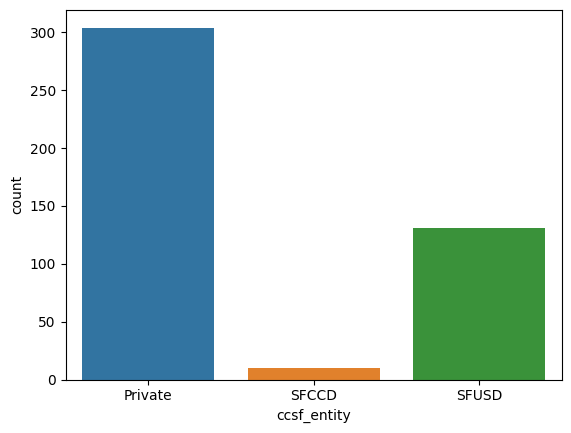

In [279]:
sns.countplot(data=df, x='ccsf_entity')

SFUSD = San Francisco Unified School District and SFCCD = San Francisco Community College District 

Distribution of CCSF Entitites per district.


<AxesSubplot: xlabel='ccsf_entity', ylabel='count'>

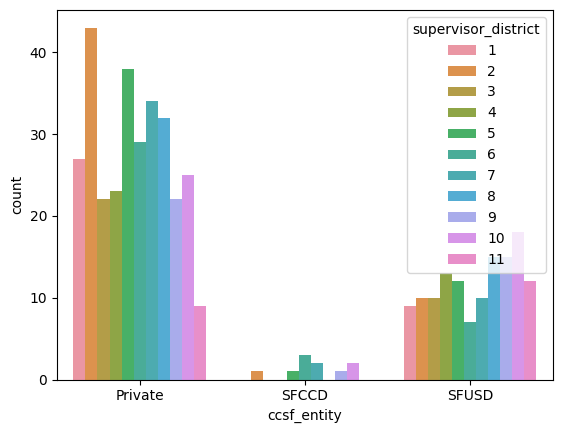

In [280]:
sns.countplot(data=df, x='ccsf_entity', hue = 'supervisor_district')

Possible to observe that SFCCD, Comunity colleges are come concetrated into the district 5, 6 and 7. while privates and SFUSD have a bigger coverage

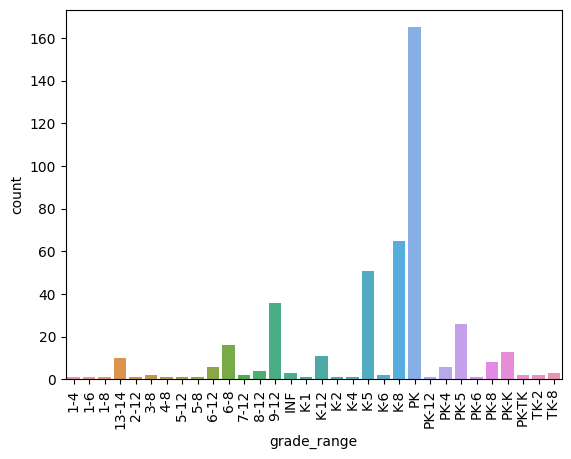

In [281]:
sns.countplot(data=df, x='grade_range')
plt.xticks(rotation=90)
None

The most common schools are the Preschool / Kindergarden

Using pairplot we can see correlation between age and grade

<Figure size 1000x500 with 0 Axes>

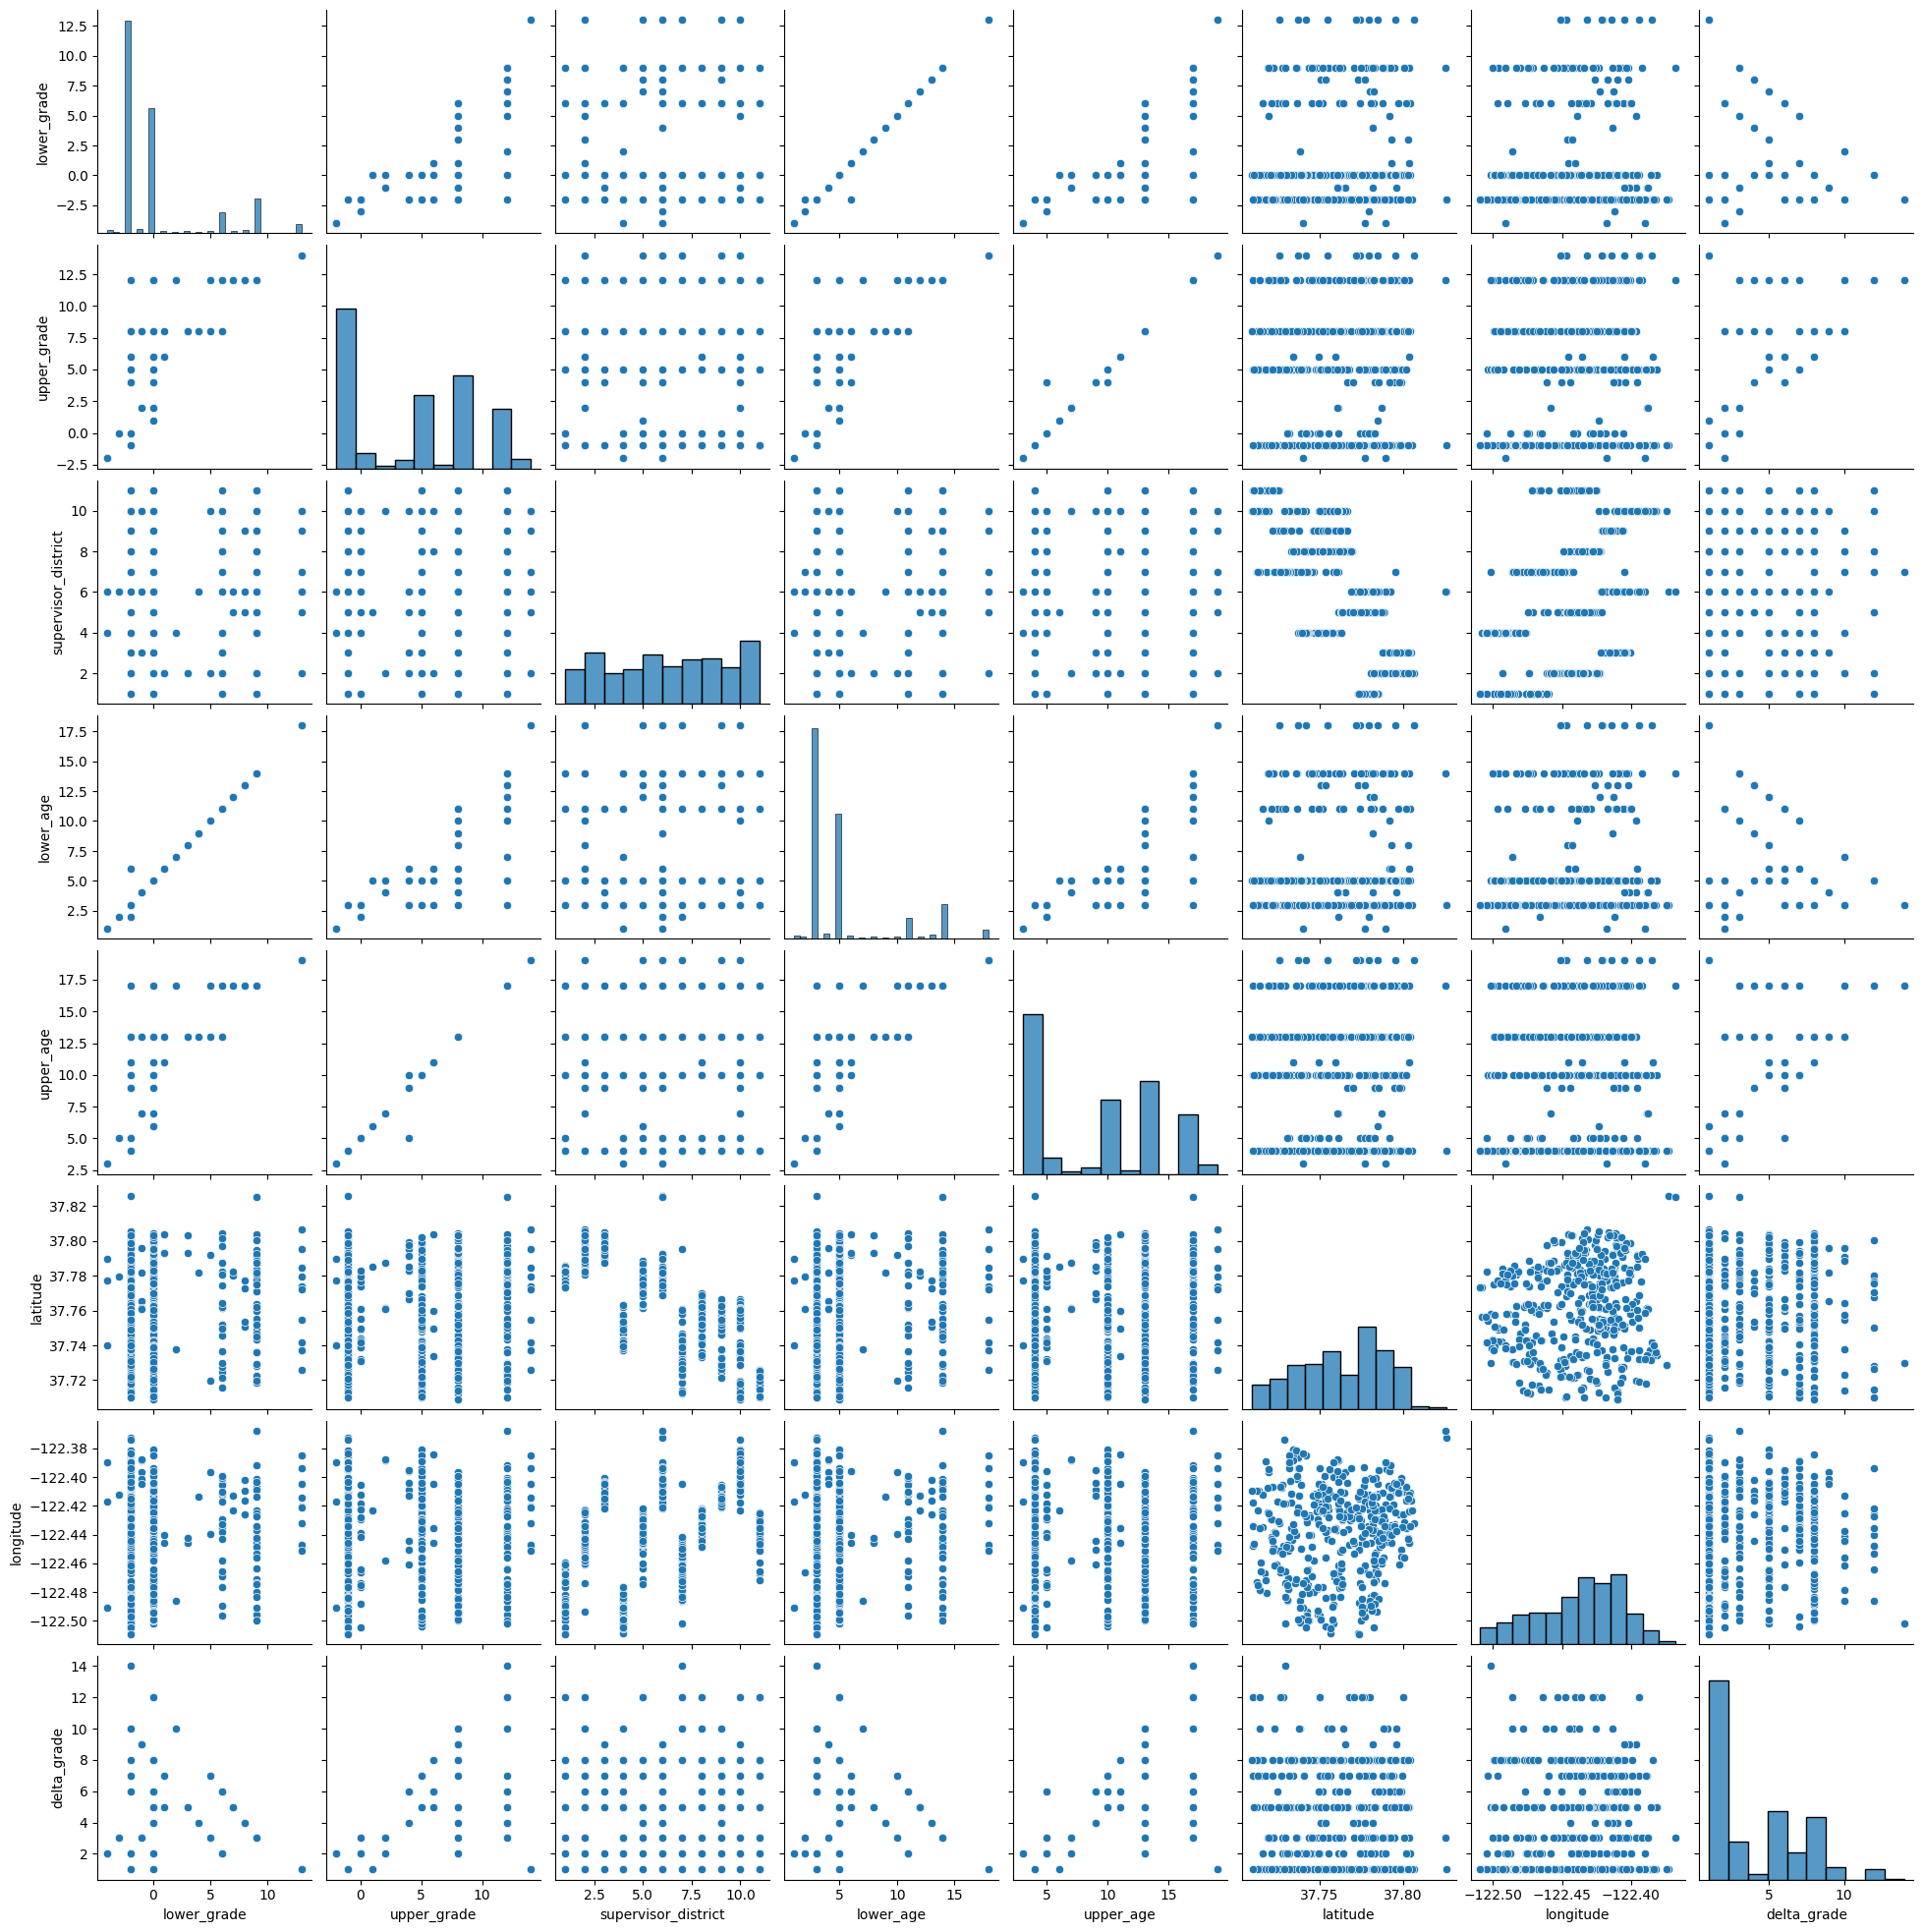

In [304]:
plt.figure(figsize=(10,5))
sns.pairplot(data=df)

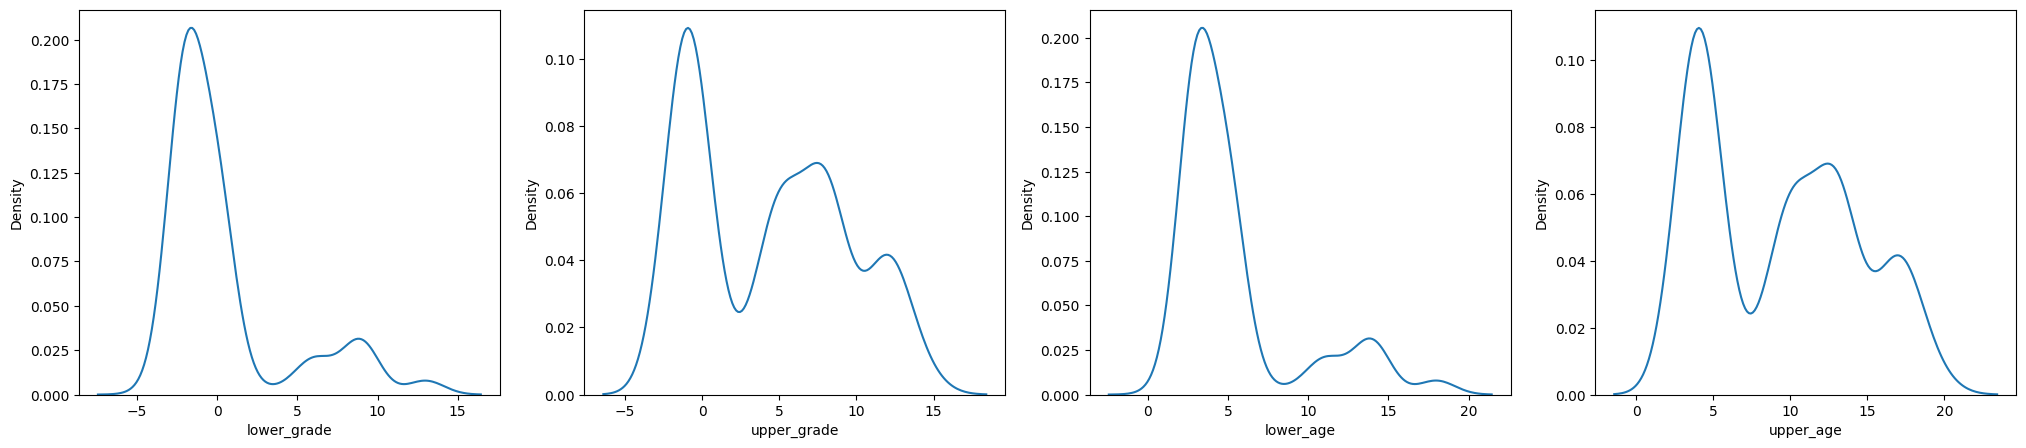

In [282]:
categories = ['lower_grade', 'upper_grade', 'lower_age', 'upper_age']

figs,axs = plt.subplots(ncols=len(categories), figsize=(25,5))
i=0
for cat in categories:
    sns.kdeplot(data=df[cat], ax=axs[i])
    i += 1

Creating a Delta Score

In [283]:

df['delta_grade'] = abs((df['lower_grade'] - df['upper_grade']))

Range of Scores and Delta Score

In [297]:
print('Range of lower scores: {0}'.format(sorted(df['lower_grade'].unique())))
print('Range of upper scores: {0}'.format(sorted(df['upper_grade'].unique())))
print('Range of delta scores: {0}'.format(sorted(df['delta_grade'].unique())))

Range of lower scores: [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13]
Range of upper scores: [-2, -1, 0, 1, 2, 4, 5, 6, 8, 12, 14]
Range of delta scores: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14]


In [285]:
sorted(df.query('lower_grade >= 5')["delta_grade"].unique())

[1, 2, 3, 4, 5, 6, 7]

In [286]:
high_grades = sorted(df['upper_grade'].unique())

Just ~15% of the schools have scores highers than 10.

In [295]:
(df.query('upper_grade > 10').shape[0]/df.shape[0]) * 100

16.179775280898877

Creating the Markers color patters based on school grades.

In [288]:
def color_col(row):
    if row['lower_grade'] <= 5:
        color = 'red'
    else:
        if row['upper_grade'] > 10:
            color = 'green'
        else:
            color = 'orange'
    return color

In [289]:
df['color'] = df.apply(color_col, axis=1)

In [290]:
df['color'].value_counts()

red       371
green      58
orange     16
Name: color, dtype: int64

In [291]:
print('There are {0} schools with RED score, representing schools with lower grade 5 or lower. That correspont to {1} of the schools'.format(df['color'].value_counts()[0],df['color'].value_counts()[0]/df.shape[0] * 100))
print('There are {0} schools with Orange score, representing schools with higher grade lower than 10. That correspont to {1} of the schools'.format(df['color'].value_counts()[1],df['color'].value_counts()[1]/df.shape[0] * 100))
print('There are {0} schools with Green score, representing schools with higher grade bigger than 10. That correspont to {1} of the schools'.format(df['color'].value_counts()[2],df['color'].value_counts()[2]/df.shape[0] * 100))

There are 371 schools with RED score, representing schools with lower grade 5 or lower. That correspont to 83.37078651685394 of the schools
There are 58 schools with Orange score, representing schools with higher grade lower than 10. That correspont to 13.03370786516854 of the schools
There are 16 schools with Green score, representing schools with higher grade bigger than 10. That correspont to 3.5955056179775284 of the schools


In [292]:
lat_center, long_center = df.latitude.sum()/len(df.latitude) , df.longitude.sum()/len(df.longitude)

In [293]:
m1=folium.Map(location=[lat_center, long_center],zoom_start=12,min_zoom=2,max_zoom=20)
m1.add_child(folium.LatLngPopup())
for index, row in df.iterrows():
    iframe = folium.IFrame('<br>' + 'Name: ' + str(row['campus_name']) + '<br>' + 'Grade_Delta#: ' + str(row['delta_grade']))
    popup = folium.Popup(iframe, min_width=350, max_width=100)
    folium.Marker(location=[row['latitude'], row['longitude']],popup=popup,icon=folium.Icon(icon="book",color=row['color'])).add_to(m1)

In [305]:
m1